<a href="https://colab.research.google.com/github/Rajib2805/Covid__visualization/blob/main/ICVL_Train_TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TIME SERIES PREDICTION OF NUMBER OF TRAINS ARRIVING AT THE PORT**

In [1268]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1269]:
target= pd.read_excel('/content/drive/MyDrive/TrainICVL.xlsx')

In [1270]:
target.head()

,TrainSlNo,Date of Despatch from Rail Siding Tete,TrainNo,Product,Depatched from Rail_Siding_Tete,Quantity Despatched as per Rail Siding Tete report,Arrival at Beira,Date of arrival at Beira,Quantity Received as per Beira report,RailNomenclature,Nectar RailNo,Remarks,CFMBIll_Unclaimed,OtherVendor_Weight,NectarWt
0,999001,2018-01-01,NaN,CC,True,3415612.0,True,2018-01-01,3415612.0,NaN,NaN,NaN,True,NaN,NaN
1,999002,2018-01-01,NaN,TC,True,670298.0,True,2018-01-01,670298.0,NaN,NaN,NaN,True,NaN,NaN
2,111001,2018-01-03,820.0,TC,True,3042.0,True,2018-01-03,3042.0,NaN,11001.0,NaN,True,NaN,NaN
3,111002,2018-01-03,822.0,TC,True,2936.0,True,2018-01-03,2936.0,NaN,11002.0,NaN,True,NaN,NaN
4,111003,2018-01-04,830.0,TC,True,2969.0,True,2018-01-04,2969.0,NaN,11003.0,NaN,True,NaN,NaN


In [1271]:
target= target[['TrainSlNo', 'Date of Despatch from Rail Siding Tete']]
target['date']= pd.DatetimeIndex(target['Date of Despatch from Rail Siding Tete']).day
target['month']= pd.DatetimeIndex(target['Date of Despatch from Rail Siding Tete']).month
target['year']= pd.DatetimeIndex(target['Date of Despatch from Rail Siding Tete']).year
target

,TrainSlNo,Date of Despatch from Rail Siding Tete,date,month,year
0,999001,2018-01-01,1,1,2018
1,999002,2018-01-01,1,1,2018
2,111001,2018-01-03,3,1,2018
3,111002,2018-01-03,3,1,2018
4,111003,2018-01-04,4,1,2018
...,...,...,...,...,...
1780,1084,2021-03-21,21,3,2021
1781,1085,2021-03-22,22,3,2021
1782,1086,2021-03-23,23,3,2021
1783,1087,2021-03-23,23,3,2021


In [1272]:
target.dtypes

TrainSlNo                                          int64
Date of Despatch from Rail Siding Tete    datetime64[ns]
date                                               int64
month                                              int64
year                                               int64
dtype: object

In [1273]:
target= target[target['TrainSlNo'] < 999000]
target

,TrainSlNo,Date of Despatch from Rail Siding Tete,date,month,year
2,111001,2018-01-03,3,1,2018
3,111002,2018-01-03,3,1,2018
4,111003,2018-01-04,4,1,2018
5,111004,2018-01-04,4,1,2018
6,111005,2018-01-05,5,1,2018
...,...,...,...,...,...
1780,1084,2021-03-21,21,3,2021
1781,1085,2021-03-22,22,3,2021
1782,1086,2021-03-23,23,3,2021
1783,1087,2021-03-23,23,3,2021


In [1274]:
target['TrainCount']= 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [1275]:
target.head()

,TrainSlNo,Date of Despatch from Rail Siding Tete,date,month,year,TrainCount
2,111001,2018-01-03,3,1,2018,1
3,111002,2018-01-03,3,1,2018,1
4,111003,2018-01-04,4,1,2018,1
5,111004,2018-01-04,4,1,2018,1
6,111005,2018-01-05,5,1,2018,1


In [1276]:
target= target[['Date of Despatch from Rail Siding Tete', 'TrainCount']]
target.head()

,Date of Despatch from Rail Siding Tete,TrainCount
2,2018-01-03,1
3,2018-01-03,1
4,2018-01-04,1
5,2018-01-04,1
6,2018-01-05,1


In [1277]:
target= target.groupby(['Date of Despatch from Rail Siding Tete']).sum()
target.head()


,TrainCount
Date of Despatch from Rail Siding Tete,
2018-01-03,2
2018-01-04,2
2018-01-05,1
2018-01-06,2
2018-01-07,2


In [1278]:
target= target.reset_index()
target

,Date of Despatch from Rail Siding Tete,TrainCount
0,2018-01-03,2
1,2018-01-04,2
2,2018-01-05,1
3,2018-01-06,2
4,2018-01-07,2
...,...,...
884,2021-03-20,2
885,2021-03-21,2
886,2021-03-22,1
887,2021-03-23,2


In [1279]:
target['cumsum'] = target.groupby([target['Date of Despatch from Rail Siding Tete'].dt.month,
                           target['Date of Despatch from Rail Siding Tete'].dt.year])['TrainCount'].cumsum()

In [1280]:
target.tail(5)

,Date of Despatch from Rail Siding Tete,TrainCount,cumsum
884,2021-03-20,2,26
885,2021-03-21,2,28
886,2021-03-22,1,29
887,2021-03-23,2,31
888,2021-03-24,1,32


(array([736695., 736815., 736938., 737060., 737180., 737303., 737425.,
        737546., 737669., 737791., 737911.]),
 <a list of 11 Text major ticklabel objects>)

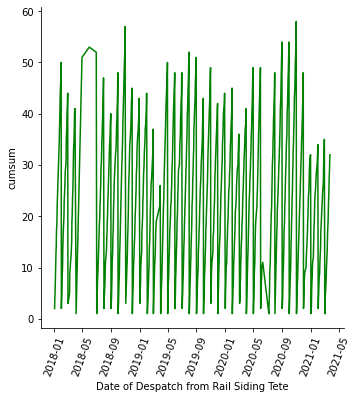

In [1281]:
import seaborn as sns
sns.relplot(x='Date of Despatch from Rail Siding Tete', y='cumsum', kind= 'line', data= target, color='green')
plt.xticks(rotation=70)

In [1282]:
#selecting only the fields which are relevant for our time-series forecasting analysis
temp_df= target[['Date of Despatch from Rail Siding Tete', 'TrainCount' ]]
temp_df.head()

,Date of Despatch from Rail Siding Tete,TrainCount
0,2018-01-03,2
1,2018-01-04,2
2,2018-01-05,1
3,2018-01-06,2
4,2018-01-07,2


 However, using the past train data for as far as 2018 might not be a good indicator for today’s train data, as there have been other recent factors that should be taken into account, for example, the gradually changig logistic events due to condition in the line.

Thus, to have a possibly better analysis and forecast result because of the understanding of recent influential factors, we would take only a subset of data from 2019 to 2021:

In [1283]:
#taking the data from 2019 to 2021 only which is relevant for our analysis
mask= (target['Date of Despatch from Rail Siding Tete'] >= '2019-01-01')

"""
# Not Using the end date parameter. Can use it if required

 & (target['Date of Despatch from Rail Siding Tete'] <='2021-02-28')

"""
mask

0      False
1      False
2      False
3      False
4      False
       ...  
884     True
885     True
886     True
887     True
888     True
Name: Date of Despatch from Rail Siding Tete, Length: 889, dtype: bool

In [1284]:
temp_df= temp_df.loc[mask]
temp_df

,Date of Despatch from Rail Siding Tete,TrainCount
237,2019-01-02,3
238,2019-01-03,2
239,2019-01-05,2
240,2019-01-06,3
241,2019-01-07,1
...,...,...
884,2021-03-20,2
885,2021-03-21,2
886,2021-03-22,1
887,2021-03-23,2


In [1285]:
#reset the index (because time series analysis can only be done when the datefield is in an ordered index)
temp_df.set_index('Date of Despatch from Rail Siding Tete', inplace=True)

In [1286]:
temp_df.tail(10)

,TrainCount
Date of Despatch from Rail Siding Tete,
2021-03-15,1
2021-03-16,1
2021-03-17,2
2021-03-18,2
2021-03-19,1
2021-03-20,2
2021-03-21,2
2021-03-22,1
2021-03-23,2


In [1287]:
temp_df.index = temp_df.index.to_period('D')

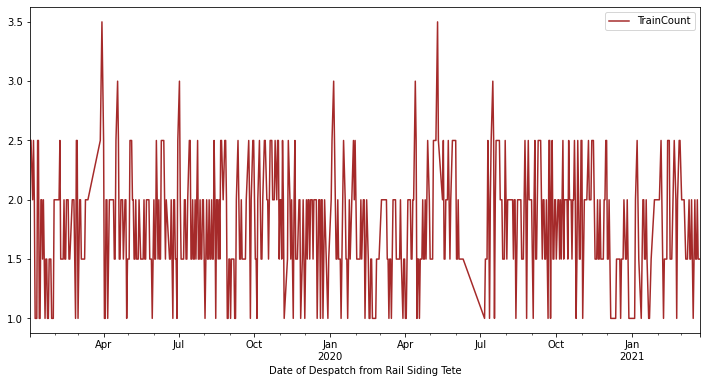

In [1288]:
#Making 2-day moving avarage to make the data cleaner and less noisy
temp_df_mean= temp_df.rolling(window=2).mean()
temp_df_mean.plot(figsize=(12,6), color='brown')

In [1289]:
temp_df_mean= temp_df_mean.dropna()

In [1290]:
temp_df_mean.head()

,TrainCount
Date of Despatch from Rail Siding Tete,
2019-01-03,2.5
2019-01-05,2.0
2019-01-06,2.5
2019-01-07,2.0
2019-01-08,1.0


In [1291]:
#Augmented Dickey Fuller Test to check stationarity of data
from statsmodels.tsa.stattools import adfuller
def adf_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
adf_test(temp_df_mean['TrainCount'])

1. ADF :  -4.166408528528046
2. P-Value :  0.0007506867101036713
3. Num Of Lags :  16
4. Num Of Observations Used For ADF Regression: 634
5. Critical Values :
	 1% :  -3.4407064257994495
	 5% :  -2.866109523416927
	 10% :  -2.5692034867497937


Since the p value above is less than 0.05, we can take that the data is stationary.

In [1292]:
"""
#Find out the best value of p, d and q for ARIMA model
!pip install pmdarima
from pmdarima import auto_arima
stepwise_fit = auto_arima(temp_df_mean['TrainCount'], trace=True,
suppress_warnings=True)
"""

"\n#Find out the best value of p, d and q for ARIMA model\n!pip install pmdarima\nfrom pmdarima import auto_arima\nstepwise_fit = auto_arima(temp_df_mean['TrainCount'], trace=True,\nsuppress_warnings=True)\n"

In [1293]:
# create a running differenced series for 1 day running difference
import numpy as np
def difference(dataset, interval=1):
 diff = list()
 for i in range(interval, len(dataset)):
    value = dataset[i] - dataset[i - interval]
    diff.append(value)
 return np.array(diff)

# calling the above function for 365 day running seasonal difference
differenced = difference(temp_df_mean.values, 365)

In [1294]:
# fit the ARIMA model
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(differenced, order=(5,0,0))
model_fit = model.fit()

# print summary of fit model
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  286
Model:                     ARMA(5, 0)   Log Likelihood                -223.652
Method:                       css-mle   S.D. of innovations              0.528
Date:                Wed, 24 Mar 2021   AIC                            461.304
Time:                        08:38:24   BIC                            486.896
Sample:                             0   HQIC                           471.562
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0232      0.059      0.397      0.692      -0.092       0.138
ar.L1.y        0.5232      0.058      8.965      0.000       0.409       0.638
ar.L2.y       -0.4572      0.065     -7.070      0.0

In [1295]:
# invert the differenced forecast to the original form
def inverse_difference(history, yhat, interval=1):
 return yhat + history[-interval]

**FORECAST FOR THE NEXT DAY**

Making one step out of forecast with forecast function

ARIMA models are great for one-step forecasts.

A one-step forecast is a forecast of the very next time step in the sequence from the available data used to fit the model.

In [1296]:
# one-step out-of sample forecast i.e forecast for the next day
X = temp_df_mean.values
forecast = model_fit.forecast()[0] #zero means the forecast for the first value
forecast = inverse_difference(X, forecast, 365)
print('Forecast: %f' % forecast)

Forecast: 1.887189


In [1297]:
#Check the accuracy metric

"""
Since we are taking all values of the dataframe for prediction, we cannot technically 
use the accuracy metric

"""
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(forecast,X[-1]))
print(rmse)

0.38718893522239983


Predict Function:

The statsmodel ARIMAResults object also provides a predict() function for making forecasts.

The predict function can be used to predict arbitrary in-sample and out-of-sample time steps, including the next out-of-sample forecast time step.

The predict function requires a start and an end to be specified, these can be the indexes of the time steps relative to the beginning of the training data used to fit the model.

In [1298]:
# one-step out of sample forecast
from pandas import datetime
start_index = len(differenced)
end_index = len(differenced)

forecast = model_fit.predict(start=start_index, end=end_index)
print('Forecast: %f' % forecast)

Forecast: -0.112811


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [1299]:
#Finding today is which day
import datetime
last_data_date = target['Date of Despatch from Rail Siding Tete'].max()
last_day= last_data_date.day


#Number of days in the running month
import calendar
year = last_data_date.year
month= last_data_date.month
days_in_month= calendar.monthrange(year, month)[1]

#Number of days remaining in the month
diff = days_in_month - last_day
print(diff)

7


**MULTI STEP FORECAST**

**FORECAST FUNCTION**

In [1300]:
# With forecast function (multi-step out-of-sample forecast)
forecast = model_fit.forecast(steps=diff)[0]

In [1301]:
import datetime
#get current time
d = datetime.datetime.now()
print(d)

#get month name short version
print(d.strftime("%b"))

2021-03-24 08:38:25.220036
Mar


In [1302]:
# invert the differenced forecast to something usable
X = temp_df_mean.values
sum=0
history = [x for x in X]
day = last_day + 1
for yhat in forecast:
 inverted = inverse_difference(history, yhat, 365)
 print('%s %d: %.1f' % (d.strftime("%b"), day, inverted)) # % s is placeholder for string, %d for number/integer, %f float
 history.append(inverted)
 sum=sum+inverted
 cum_daily= sum+df['TrainCount'].sum()
 day= day+1

Mar 25: 1.9
Mar 26: 2.0
Mar 27: 0.9
Mar 28: 2.0
Mar 29: 1.9
Mar 30: 1.0
Mar 31: 2.0


In [1303]:
#The sum is coming in decimal. We convert it to integer
print(int(sum))

11


**PREDICT FUNCTION:**

The predict() function can also forecast the next 7 out-of-sample time steps.

Using time step indexes, we can specify the end index as 6 more time steps in the future; for example:

In [1304]:
# multi-step out-of-sample forecast
start_index= last_day
end_index = days_in_month-1
forecast = model_fit.predict(start=start_index, end=end_index)

In [1305]:
#The sum is coming in decimal, We convert it to integer
print(int(sum))

11


In [1306]:
#Finding the first day of the current month
import datetime
date = datetime.date.today().replace(day=1)
print(date)

#Finding the dataframe for the data imported for the current month (first day of the month to the data import day)
start_date = datetime.date.today().replace(day=1)
end_date = datetime.date.today()
mask = (target['Date of Despatch from Rail Siding Tete'] >= pd.to_datetime(start_date)) & (target['Date of Despatch from Rail Siding Tete'] <= pd.to_datetime(end_date))
df = target.loc[mask]

2021-03-01


In [1307]:
#invert the differenced forecast to something usable
X = temp_df_mean.values
sum=0
history = [x for x in X]
day = last_day + 1
for yhat in forecast:
 inverted = inverse_difference(history, yhat, 365)
 print('%s %d: %.1f trains' % (d.strftime("%b"), day, inverted)) # % s is placeholder for string, %d for number/integer, %f float
 history.append(inverted)
 sum= sum + inverted
 cum_daily= sum+df['TrainCount'].sum()
 print('Cumulative trains at the end of %s %d: %.1f' % (d.strftime("%b"), day, cum_daily)) # % s is placeholder for string, %d for number/integer, %f float
 day += 1


Mar 25: 2.6 trains
Cumulative trains at the end of Mar 25: 34.6
Mar 26: 2.1 trains
Cumulative trains at the end of Mar 26: 36.7
Mar 27: 0.7 trains
Cumulative trains at the end of Mar 27: 37.3
Mar 28: 2.3 trains
Cumulative trains at the end of Mar 28: 39.6
Mar 29: 1.5 trains
Cumulative trains at the end of Mar 29: 41.1
Mar 30: 0.8 trains
Cumulative trains at the end of Mar 30: 42.0
Mar 31: 2.4 trains
Cumulative trains at the end of Mar 31: 44.4


In [1308]:
print('Trains already sent during the month: ', df['TrainCount'].sum())
print('Trains projected during the rest of the month: ', int(sum))
print('Total trains expected for the month: ',  df['TrainCount'].sum() + int(sum))

Trains already sent during the month:  32
Trains projected during the rest of the month:  12
Total trains expected for the month:  44
